Problem: What are the most important features that influence the success rate of the campaign?

In [1]:
# !pip install seaborn --upgrade
# !pip install plotly==5.4.0

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re
import os
from datetime import date

import plotly.express as px
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
warnings.filterwarnings("ignore")

sns.__version__

'0.11.2'

In [3]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 12

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 0.5)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [4]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import collections
# check version number
import imblearn

print(imblearn.__version__)

0.8.1


In [5]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81


In [6]:
print('Number of records :',data.shape[0])
print('Number of features :',data.shape[1])

Number of records : 1037
Number of features : 105


In [7]:
# data = data.drop(columns = data.columns[80:-4], axis = 1)
# data.head()

# Exploratory Data Analysis

In [8]:
# data.describe()

In [9]:
data

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81
2,2019-03-03,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671177.75,299434.47,125703.0,5193938.29
3,2019-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265077.82,123662.13,58639.5,1842761.07
4,2019-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161678.91,64793.74,45278.5,3814992.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Columns: 105 entries, Date to FinancedAmount
dtypes: float64(25), int64(79), object(1)
memory usage: 850.8+ KB


## 1) Null values

In [11]:
pd.DataFrame(data.isnull().sum(), columns=['#Null values']).T

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
#Null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/len(data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 105 column(s).
There is/are 0 column(s) that has/have missing values.


,total_missing,perc_missing
Date,0,0.0
Amount of Employee pricing % off,0,0.0
off Particular Item?,0,0.0
Amount of % Off Particular Item,0,0.0
Location Specific?,0,0.0
...,...,...
Saskatchewan_C6_Stay at home requirements_1.0,0,0.0
WrittenSales,0,0.0
Margin,0,0.0
Traffic,0,0.0


In [13]:
data.columns

Index(['Date', 'Amount of Employee pricing % off', 'off Particular Item?',
       'Amount of % Off Particular Item', 'Location Specific?',
       'off 1st item?', 'Amount of % off 1st item', 'off conditional?',
       'Amount of $ off conditional', 'Amount of % off conditional',
       ...
       'Saskatchewan_C1_School closing_2.0',
       'Saskatchewan_C1_School closing_3.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_1.0', 'WrittenSales',
       'Margin', 'Traffic', 'FinancedAmount'],
      dtype='object', length=105)

- 'Event_detailed', 'Event' : string - event name
- 'Start Date', 'End Date': date - date columns in datetime format
- 'Written_$', 'Written_GM_%', 'Written_GM_$', 'Traffic', 'SPG_caclculated_$'- feature to be predicted (target variables)
- rest of the features - independent features

In [14]:
# import pylab as pl
# data.iloc[:-4:].hist(bins=30, figsize=(12,12))
# pl.suptitle("Histogram for numeric variables")
# # plt.savefig('...')
# plt.show()

# 2- Investigating a Linear Relationship 
Linear regression analysis has five key assumptions. These are:

- We are investigating a linear relationship
- All variables follow a normal distribution
- There is very little or no multicollinearity
- There is little or no autocorrelation
- Data is homoscedastic

In [15]:
import statsmodels.api as sm

In [16]:
data

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81
2,2019-03-03,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671177.75,299434.47,125703.0,5193938.29
3,2019-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265077.82,123662.13,58639.5,1842761.07
4,2019-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161678.91,64793.74,45278.5,3814992.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [17]:
data.columns

Index(['Date', 'Amount of Employee pricing % off', 'off Particular Item?',
       'Amount of % Off Particular Item', 'Location Specific?',
       'off 1st item?', 'Amount of % off 1st item', 'off conditional?',
       'Amount of $ off conditional', 'Amount of % off conditional',
       ...
       'Saskatchewan_C1_School closing_2.0',
       'Saskatchewan_C1_School closing_3.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_1.0', 'WrittenSales',
       'Margin', 'Traffic', 'FinancedAmount'],
      dtype='object', length=105)

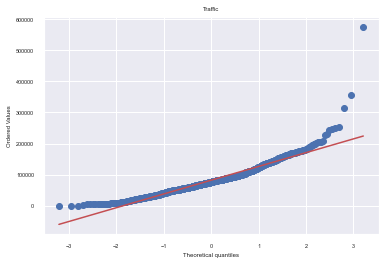

In [18]:
from scipy import stats

stats.probplot(data["Traffic"], dist="norm", plot=plt)
plt.title(f"Traffic")
plt.show()

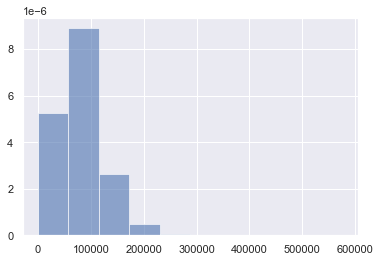

In [27]:
plt.hist(data["Traffic"], bins=10, density=True, alpha=0.6, color='b')

plt.show()

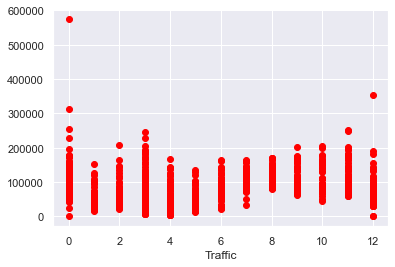

In [28]:
y= data["Traffic"]

X= data["month"]
plt.scatter(X, y, color = 'red')
plt.title(f'')
plt.xlabel('Traffic')
plt.ylabel(f'')
plt.show()

In [29]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr

X = data["Traffic"] 

# calculate spearman's correlation
for i in range(9, len(data.columns)):
    y = data.iloc[:,i]
    corr, _ = spearmanr(X, y)
    print(f"Spearmans correlation between Traffic and {data.columns[i]}:", corr)

Spearmans correlation between Traffic and Amount of % off conditional: 0.13874489767921583
Spearmans correlation between Traffic and off HomeStore Specials?: -0.0030695371963619204
Spearmans correlation between Traffic and Amount of % Off Homestore Specials : -0.0030695371963619204
Spearmans correlation between Traffic and Amount of % off Reg Price Living, Dining, amd M. Bedroom : -0.035482300031494725
Spearmans correlation between Traffic and % off reg. price living, dining, and m. bedroom?: -0.035482300031494725
Spearmans correlation between Traffic and off rest of purchase?: 0.0661402408461268
Spearmans correlation between Traffic and Amount of % off rest of purchase : 0.06666769710115518
Spearmans correlation between Traffic and off sectionals?: 0.005086299238599711
Spearmans correlation between Traffic and Amount % off sectionals : 0.005086299238599711
Spearmans correlation between Traffic and amount of % off sofa w/ full price loveseat : 0.11408132370514325
Spearmans correlation 

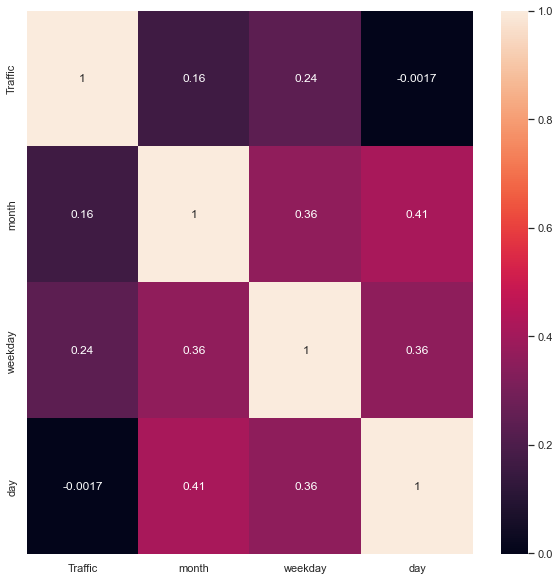

In [30]:
# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

df_date= data[[ 
'Traffic',
'month',
'weekday',
'day'
]]

# taking all rows but only 6 columns

correlation_mat = df_date.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(correlation_mat, annot = True)

plt.show()


In [31]:
correlation_mat

,Traffic,month,weekday,day
Traffic,1.000000,0.163937,0.240267,-0.001733
month,0.163937,1.000000,0.358819,0.413337
weekday,0.240267,0.358819,1.000000,0.356131
day,-0.001733,0.413337,0.356131,1.000000


- Traffic and duration:0.694001
- The day, month, and year are less correlated with the target variable.
- The date variables makes sense in aspect of duration.

### Dichotomized features

In [32]:
df_yes_no= data[[
'Traffic', 
'off Particular Item?',
'Location Specific?',
'off 1st item?', 
'off conditional?',
'off HomeStore Specials?', 
'off rest of purchase?',
'off sectionals?',
'sofa w full-price loveseat?',
'Add. % off CLA?',
'off JUV?',
'off OTB (occasional tables)?',
' Financing?',
'Black Friday?', 
'BMSM?',
'Canada Day', 
'Clearance (CLA)', 
'Doorcrashers', 
'Easter Weekend',
'First Item?', 
'Flash', 
'Flash Items Only', 
'Family Spaces',
'off reg priced furniture?', 
'% off reg. price living, dining, and m. bedroom?',
'Tax', 
# 'Week 1', we can exclude this since when the following four variables are 0, this is 1 by default
'Week 2', 
'Week 3', 
'Week 4',
'Week 5', 
'Wrap', 
'$X off with $Y', 
'X% on orders over $Y',
'$X off over $Y',
'High Impact', 
'Item and Price (I&P)', 
'Matress Deal',
'Flyer continues', 
'No flyer items', 
'No Flyers', 
'No promo items',
'Online Only', 
'OR', 
'Percent  discount?',
'simple event', 
'Prospect Event', 
'Red Tag Sale', 
'Rest Test',
'Separate item selections']]

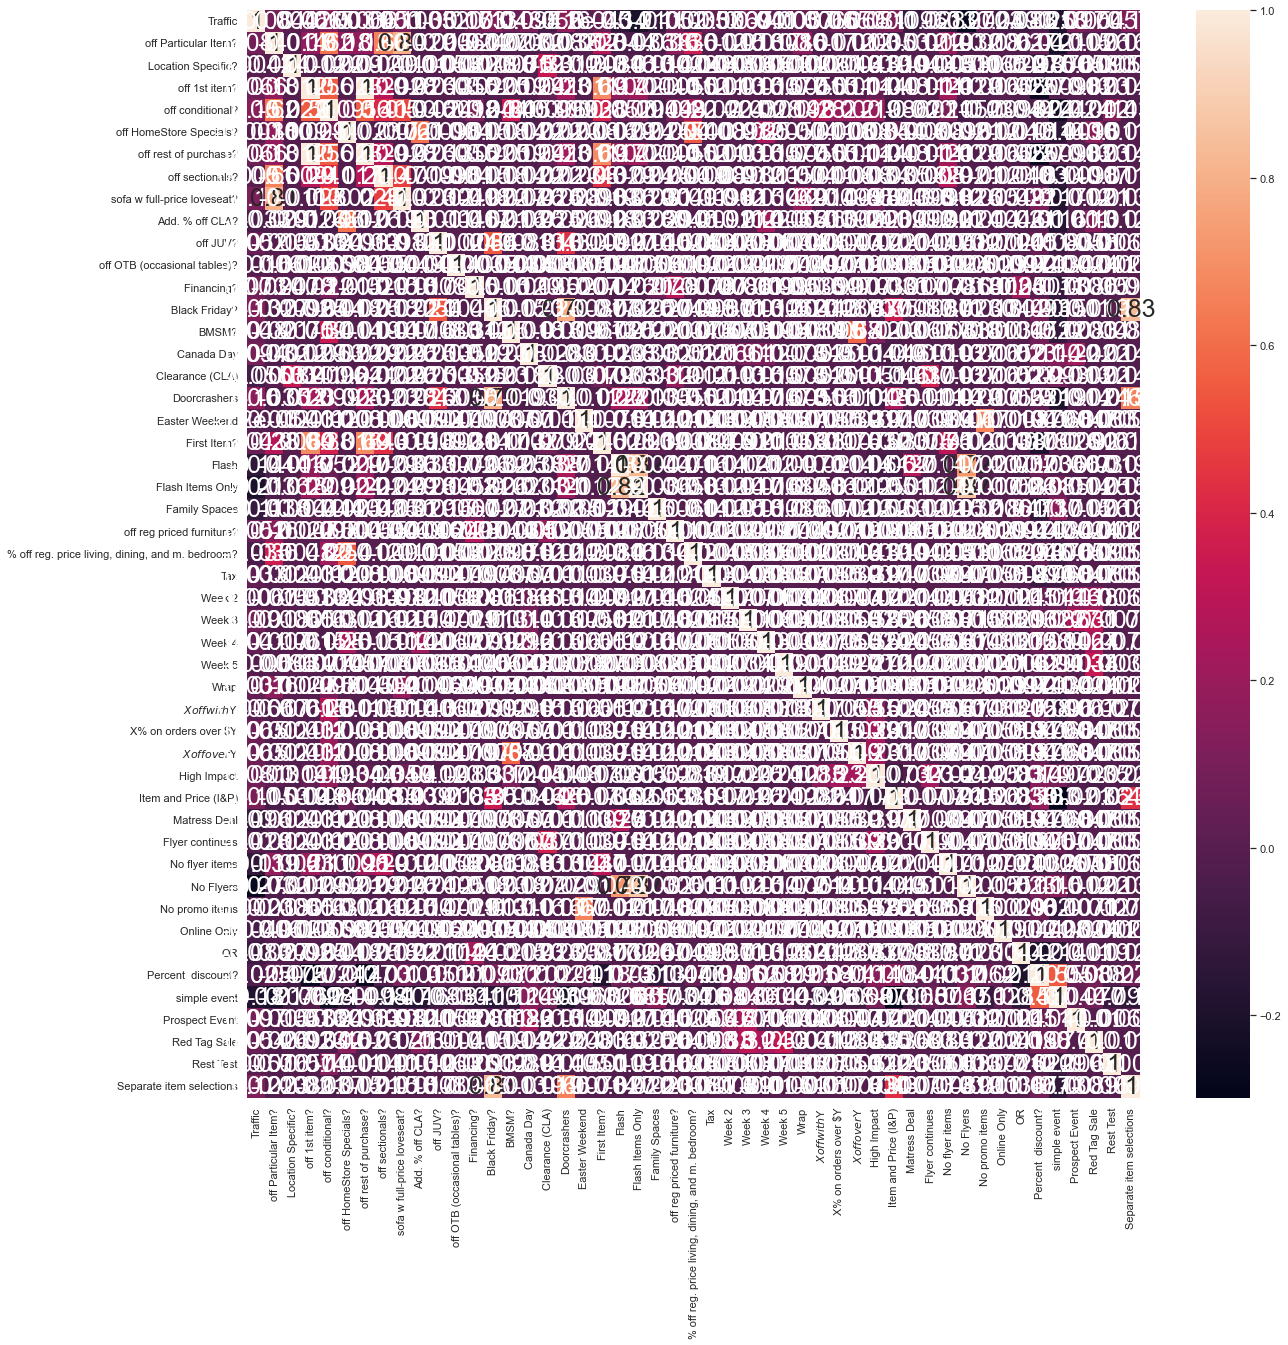

In [33]:
# Set default font size
plt.rcParams['font.size'] = 25

correlation_mat = df_yes_no.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [34]:
correlation_mat

,Traffic,off Particular Item?,Location Specific?,off 1st item?,off conditional?,off HomeStore Specials?,off rest of purchase?,off sectionals?,sofa w full-price loveseat?,Add. % off CLA?,off JUV?,off OTB (occasional tables)?,Financing?,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,"% off reg. price living, dining, and m. bedroom?",Tax,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections
Traffic,1.000000,0.084482,0.004209,0.066140,0.145781,-0.003070,0.066140,0.005086,0.113104,-0.033420,0.052114,-0.015983,0.073106,0.127326,0.047801,0.093905,-0.055439,0.159712,-0.000052,0.043424,-0.137436,-0.206973,-0.114177,0.051581,-0.035482,0.033363,-0.006711,0.090192,0.040868,-0.004993,0.037155,0.006627,0.065271,0.064700,0.081108,0.111777,-0.095932,-0.027751,-0.127417,-0.271106,0.002257,-0.048882,-0.082542,-0.025198,-0.184051,0.096922,0.054042,0.005704,0.117487
off Particular Item?,0.084482,1.000000,-0.013575,0.176734,0.617733,0.176914,0.176734,0.661935,0.805881,-0.028714,-0.014878,-0.006059,0.024155,-0.027350,-0.021103,-0.032489,-0.000824,-0.034802,-0.012136,0.277278,-0.044356,-0.036451,-0.038038,0.159298,0.356891,-0.012136,-0.014878,-0.018249,-0.017197,-0.008573,0.159298,-0.017197,-0.012136,-0.012136,0.030305,-0.053274,-0.012136,-0.012136,0.188133,-0.031888,-0.018249,-0.006059,-0.027350,0.039914,-0.212970,-0.014878,-0.025921,-0.016078,-0.022816
Location Specific?,0.004209,-0.013575,1.000000,-0.012219,-0.021976,-0.008986,-0.012219,-0.008986,-0.010940,-0.010248,-0.005310,-0.002163,-0.007843,-0.009761,-0.007531,-0.011595,0.331954,-0.012420,-0.004331,-0.008433,-0.015830,-0.013009,-0.013575,-0.002163,-0.004845,-0.004331,-0.005310,-0.006513,-0.006137,-0.003060,-0.002163,-0.006137,-0.004331,-0.004331,-0.018584,-0.019013,-0.004331,-0.004331,-0.005310,-0.011381,-0.006513,-0.002163,-0.009761,-0.074896,-0.076007,-0.005310,-0.009251,-0.005738,-0.008143
off 1st item?,0.066140,0.176734,-0.012219,1.000000,0.555999,-0.022662,1.000000,0.289494,-0.027591,-0.025844,-0.013391,-0.005454,-0.019779,-0.024617,-0.018994,-0.029243,0.040630,0.230634,-0.010923,0.690142,0.169568,0.218046,-0.004098,-0.005454,-0.012219,-0.010923,-0.013391,-0.016425,-0.015478,-0.007717,-0.005454,-0.015478,-0.010923,-0.010923,0.044019,-0.047950,-0.010923,-0.010923,0.210592,-0.028701,-0.016425,-0.005454,-0.024617,-0.265159,-0.009779,-0.013391,-0.023331,-0.014471,-0.020536
off conditional?,0.145781,0.617733,-0.021976,0.555999,1.000000,0.091493,0.555999,0.408899,0.497819,-0.046482,-0.024085,-0.009809,0.115367,-0.044275,0.342705,-0.052595,0.009572,0.099041,-0.019647,0.383718,0.052453,0.089785,-0.043700,0.098404,0.220464,-0.019647,-0.024085,-0.029542,-0.027838,-0.013879,0.098404,0.279273,0.197093,0.197093,0.185249,-0.086240,-0.019647,-0.019647,0.108769,-0.051621,-0.029542,-0.009809,-0.044275,-0.024488,-0.236863,-0.024085,-0.041962,0.138051,-0.036935
off HomeStore Specials?,-0.003070,0.176914,-0.008986,-0.022662,0.091493,1.000000,-0.022662,-0.016667,-0.020291,0.613392,-0.009849,-0.004011,-0.014546,-0.018104,-0.013969,-0.021506,-0.021506,-0.023036,-0.008033,-0.015640,-0.029361,-0.024128,-0.025179,-0.004011,0.539164,-0.008033,-0.009849,-0.012080,0.249006,-0.005675,-0.004011,-0.011383,-0.008033,-0.008033,-0.034468,0.054365,-0.008033,-0.008033,-0.009849,-0.021108,-0.012080,-0.004011,-0.018104,-0.013523,-0.140972,-0.009849,0.157284,-0.010643,-0.015103
off rest of purchase?,0.066140,0.176734,-0.012219,1.000000,0.555999,-0.022662,1.000000,0.289494,-0.027591,-0.025844,-0.013391,-0.005454,-0.019779,-0.024617,-0.018994,-0.029243,0.040630,0.230634,-0.010923,0.690142,0.169568,0.218046,-0.004098,-0.005454,-0.012219,-0.010923,-0.013391,-0.016425,-0.015478,-0.007717,-0.00

In [35]:
sns.set_context(font_scale=1.2, rc={"lines.linewidth": 2.5})

In [ ]:
promo_corr = df_yes_no.corr(method='spearman').iloc[0,1:]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Traffic', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Traffic');

In [ ]:
promo_corr = df_yes_no.corr(method='pearson').iloc[0,1:]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Traffic', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Traffic');

### Continous Features

In [ ]:
df_amount= data[[ 
'Traffic',
'month',
'weekday',
'day',
'Amount of % Off Particular Item', 
'Amount of % off 1st item', 
'Amount of $ off conditional', 
'Amount of % off conditional',
'Amount of % Off Homestore Specials ',
'Amount of % off Reg Price Living, Dining, amd M. Bedroom ',
'Amount of % off rest of purchase ',
'Amount % off sectionals ',
'amount of % off sofa w/ full price loveseat ',
'Amount of % Accessories',
'Amount of % Off CLA ', 
'Amount of % Off JUV ',
'Amount of % Off OTB(occasional tables)', 
'Amount of % When Financing ', 
'Amount of % With Rest Test ',
'Amount % Off at 090', 
'Amount % off in AB', 
'Amount % off in GTA',
'Amount % off in MB', 
'Amount % Savings over $2499',
'Amount of %  Savings for $1499 or more',
'Amount of % Savings over $2000',  
'Amount of off reg priced furniture',
' Percent  Amount',  
'Amount of x GST Savings ',
'Amount x Tax Savings']]

In [ ]:
sns.set_context(font_scale=0.6, rc={"lines.linewidth": 2.5})

correlation_mat = df_amount.corr(method='pearson')
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
correlation_mat

In [ ]:
sns.set_context(font_scale=1.2, rc={"lines.linewidth": 2.5})

promo_corr = df_amount.corr(method='pearson').iloc[0,1:]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Traffic', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Traffic');

In [ ]:
df_covid= data[[ 
'Traffic', 'Ontario_C1_School closing_1.0',
       'Ontario_C1_School closing_2.0', 'Ontario_C1_School closing_3.0', 'Ontario_C2_Workplace closing_1.0',
       'Ontario_C2_Workplace closing_2.0', 'Ontario_C2_Workplace closing_3.0',
       'Ontario_C6_Stay at home requirements_1.0',
       'Ontario_C6_Stay at home requirements_2.0', 'Manitoba_C1_School closing_1.0',
       'Manitoba_C2_Workplace closing_1.0',
       'Manitoba_C2_Workplace closing_2.0',
       'Manitoba_C2_Workplace closing_3.0',
       'Manitoba_C6_Stay at home requirements_1.0',
       'Manitoba_C6_Stay at home requirements_2.0',
       'Saskatchewan_C1_School closing_2.0',
       'Saskatchewan_C1_School closing_3.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_1.0']]

In [ ]:
sns.set_context(font_scale=0.8, rc={"lines.linewidth": 2.5})

correlation_mat = df_covid.corr(method='spearman')
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(correlation_mat, annot = True)

plt.show()

In [ ]:
correlation_mat

In [ ]:
promo_corr = df_covid.corr(method='spearman').iloc[0,1:]
corr_df = pd.DataFrame(data = promo_corr, index = promo_corr.index ).sort_values (by = 'Traffic', ascending = False)

plt.figure(figsize = (20,5))
sns.set_palette('mako')
plt.xticks(rotation = 90)
plt.title('Feature correlation')
sns.barplot (data = corr_df, x = corr_df.index, y = 'Traffic');

C1 | `C1_School closing` | Record closings of schools and universities | Ordinal scale | 0 - no measures <br/>1 - recommend closing or all schools open with alterations resulting in significant differences compared to non-Covid-19 operations <br/>2 - require closing (only some levels or categories, eg just high school, or just public schools) <br/>3 - require closing all levels <br/>Blank - no data |

 C2 | `C2_Workplace closing` | Record closings of workplaces | Ordinal scale | 0 - no measures <br/>1 - recommend closing (or recommend work from home) or all businesses open with alterations resulting in significant differences compared to non-Covid-19 operation <br/>2 - require closing (or work from home) for some sectors or categories of workers <br/>3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) <br/>Blank - no data |

| C6 | `C6_Stay at home requirements` | Record orders to "shelter-in-place" and otherwise confine to the home | Ordinal scale | 0 - no measures <br/>1 - recommend not leaving house <br/>2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips <br/>3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc) <br/>Blank - no data |

### OLS (Ordinary least squares)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,  r2_score

###### only continous features

In [ ]:
import statsmodels.api as sm

X = df_amount.drop([ "Traffic"],axis=1)
y = df_amount["Traffic"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

###### only continous features  - train/test

In [ ]:
X = df_amount.drop([ "Traffic"],axis=1)
y = df_amount["Traffic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) # make the predictions by the model

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2:", r2)

# Print out the statistics
model.summary()

###### all features 

In [ ]:
X = data.iloc[:, 1:-4]
y = data.Traffic.values.reshape(-1,1)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

###### all features train/test

http://www.science.smith.edu/~jcrouser/SDS293/labs/lab7-py.html

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
X = data.iloc[:, 1:-4]
y = data.Traffic.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit()
y_pred = model.predict(X_test) # make the predictions by the model

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("RMSE:", rmse)
print("R2:", r2)

# Print out the statistics
model.summary()

## Linear Regression

#### all features - train-test

In [ ]:
######## Without cross validation. results are not trustable. random_state value change the r-square score!
X = data.iloc[:, 1:-4]
y = data.Traffic.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

# print("intercept:", regressor.intercept_)
# print("coefficient:", regressor.coef_)

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
r2_test = r2_score(y_test,y_pred)
print("RMSE test:", rmse_test)
print("R2 test:", r2_test*100,'%')

### all features - 10-fold cross validation 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
X = data.iloc[:, 1:-4]
y = data.Traffic.values.reshape(-1,1)

lm = LinearRegression()
model = lm.fit(X_train, y_train)
crossvalidation = KFold(n_splits=10, random_state=None, shuffle=False)

scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=crossvalidation, n_jobs=1)
R2_scores = cross_val_score(model, X, y, scoring='r2', cv=crossvalidation)

print("MSE:", str(np.mean(np.abs(scores))))
print("RMSE:",str(np.sqrt(np.mean(np.abs(scores)))))
print("R2:", str(np.mean(np.abs(R2_scores*100))),'%')
print("STD:", str(np.std(scores)))

In [ ]:
R2_scores

10 fold cross validation provided R-square pretty high. Let's conduct hyperparameter tuning!

# Linear Regression with Grid Search and RFE

In [ ]:
# %% libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
X = data.iloc[:, 1:-4]
y = data["Traffic"].values.reshape(-1,1)

# train test split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,len(X.columns)))}]

In [ ]:
# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm)            

In [ ]:
# 3.2 call GridSearchCV()`
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

In [ ]:
# fit the model
model_cv.fit(x_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
# print(cv_results)

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
cv_results[["param_n_features_to_select","mean_train_score","mean_test_score"]]

In [ ]:
n_features_optimal = cv_results["param_n_features_to_select"][cv_results["mean_test_score"] == cv_results["mean_test_score"].max()].values
n_features_optimal

In [ ]:
cv_results["mean_test_score"].max(), cv_results["mean_train_score"].max()

In [ ]:
# final model
n_features_optimal = 98

In [ ]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(x_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(x_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print("R_square_score for Traffic GridSearchCV RFE:", r2)
print("MAE for Traffic GridSearchCV RFE:", mae)
print("MSE for Traffic GridSearchCV RFE:", mse)
print("RMSE for Traffic GridSearchCV RFE:", np.sqrt(mse))


In [ ]:
rfe

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(y_pred, label = 'predict')
plt.show()

# Gradient Boosting Regression

Gradient Boosting trains many models in a gradual, additive and sequential manner. The major difference between AdaBoost and Gradient Boosting Algorithm is how the two algorithms identify the shortcomings of weak learners (eg. decision trees). While the AdaBoost model identifies the shortcomings by using high weight data points, gradient boosting performs the same by using gradients in the loss function (y=ax+b+e , e needs a special mention as it is the error term). The loss function is a measure indicating how good are model’s coefficients are at fitting the underlying data. A logical understanding of loss function would depend on what we are trying to optimise. We are trying to predict the sales prices by using a regression, then the loss function would be based off the error between true and predicted house prices.

In [ ]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = data.iloc[:, 1:-4]
y = data["Traffic"].values.reshape(-1,1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
GBR = ensemble.GradientBoostingRegressor()

In [ ]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,len(X.columns)))}]

In [ ]:
GBR.fit(X_train, y_train) 
rfe = RFE(GBR)

In [ ]:
model_cv = GridSearchCV(estimator=rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)

In [ ]:
GBR.get_params().keys()

In [ ]:
# # 3.2 call GridSearchCV()`
# model_cv = GridSearchCV(estimator = rfe, 
#                         param_grid = hyper_params, 
#                         scoring= 'r2', 
#                         cv = folds, 
#                         verbose = 1,
#                         return_train_score=True) 

In [ ]:
# fit the model
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
# print(cv_results)

In [ ]:
cv_results

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
# plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
n_features_optimal = cv_results["param_n_features_to_select"][cv_results["mean_test_score"] == cv_results["mean_test_score"].max()].values
n_features_optimal

In [ ]:
cv_results["mean_test_score"].max() #, cv_results["mean_train_score"].max()

In [ ]:
# final model
n_features_optimal = 30

In [ ]:
GBR = ensemble.GradientBoostingRegressor()

rfe = RFE(GBR, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print("R_square_score for Traffic GridSearchCV RFE:", r2)
print("MAE for Traffic GridSearchCV RFE:", mae)
print("MSE for Traffic GridSearchCV RFE:", mse)
print("RMSE for Traffic GridSearchCV RFE:", np.sqrt(mse))


In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(y_pred, label = 'predict')
plt.show()

# Decision Tree Regression 

The decision tree is a simple machine learning model for getting started with regression tasks.

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details).

In [ ]:
X = data.iloc[:, 1:-4]
y = data["Traffic"].values.reshape(-1,1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

In [ ]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [ ]:
print('R2:', sklearn.metrics.r2_score(y_test, dtr_pred))
print('MAE:', sklearn.metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', sklearn.metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, dtr_pred)))

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(dtr_pred, label = 'predict')
plt.show()

# Support Vector Machine Regression

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated.

In [ ]:
X = data.iloc[:, 1:-4]
y = data["Traffic"].values.reshape(-1,1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=100)

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

In [ ]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [ ]:
print('R2:', sklearn.metrics.r2_score(y_test, svr_pred))
print('MAE:', sklearn.metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', sklearn.metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, svr_pred)))

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

# Random Forest Regression

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap Aggregation, commonly known as bagging. What is bagging you may ask? Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.

In [ ]:
X = data.iloc[:, 1:-4]
y = data["Traffic"].values.reshape(-1,1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X_train, y_train)

In [ ]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [ ]:
print('R2:', sklearn.metrics.r2_score(y_test, rfr_pred))
print('MAE:', sklearn.metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', sklearn.metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, rfr_pred)))

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()

# LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
# import re
# data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [ ]:
data.columns

In [ ]:


X = data.iloc[:, 1:-4]
y = data["Traffic"].values.reshape(-1,1)


# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [ ]:
X_train

In [ ]:
# model_lgb.fit(X_train,y_train)

In [ ]:
# lgb_pred = model_lgb.predict(X_test)
# lgb_pred = lgb_pred.reshape(-1,1)

In [ ]:
# print('R2:', sklearn.metrics.r2_score(y_test, lgb_pred))
# print('MAE:', sklearn.metrics.mean_absolute_error(y_test, lgb_pred))
# print('MSE:', sklearn.metrics.mean_squared_error(y_test, lgb_pred))
# print('RMSE:', np.sqrt(sklearn.metrics.mean_squared_error(y_test, lgb_pred)))

In [ ]:
# plt.figure(figsize=(15,8))
# plt.scatter(y_test,lgb_pred, c='orange')
# plt.xlabel('Y Test')
# plt.ylabel('Predicted Y')
# plt.show()

In [ ]:
# plt.figure(figsize=(16,8))
# plt.plot(y_test,label ='Test')
# plt.plot(lgb_pred, label = 'predict')
# plt.show()

# Model Comparison

In [ ]:
error_rate=np.array([sklearn.metrics.mean_squared_error(y_test, y_pred),sklearn.metrics.mean_squared_error(y_test, clf_pred),sklearn.metrics.mean_squared_error(y_test, dtr_pred),sklearn.metrics.mean_squared_error(y_test, svr_pred),sklearn.metrics.mean_squared_error(y_test, rfr_pred)])

In [ ]:
error_rate